# Time Complexity Analysis of Sorting Algorithms

This notebook compares the performance of three sorting algorithms: Bubble Sort, Insertion Sort, and Quick Sort across different input sizes.

In [1]:
from random import randint
from time import time
import matplotlib.pyplot as plt

## Bubble Sort
Time Complexity: O(n²) for average, best, and worst cases

In [2]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

Testing Bubble Sort with stabilization...
Testing size 100... Avg: 0.00087s (4 runs)
Testing size 250... Avg: 0.01554s (4 runs)
Testing size 500... Avg: 0.03017s (4 runs)
Testing size 750... Avg: 0.11633s (4 runs)
Testing size 1000... Avg: 0.11633s (4 runs)
Testing size 1000... Avg: 0.18868s (4 runs)
Testing size 1500... Avg: 0.18868s (4 runs)
Testing size 1500... Avg: 0.39089s (4 runs)
Testing size 2000... Avg: 0.39089s (4 runs)
Testing size 2000... Avg: 0.62116s (4 runs)
Testing size 2500... Avg: 0.62116s (4 runs)
Testing size 2500... Avg: 0.33844s (4 runs)
Testing size 3000... Avg: 0.33844s (4 runs)
Testing size 3000... Avg: 0.40841s (4 runs)
Testing size 4000... Avg: 0.40841s (4 runs)
Testing size 4000... Avg: 0.72030s (4 runs)
Testing size 5000... Avg: 0.72030s (4 runs)
Testing size 5000... Avg: 1.04104s (4 runs)
Avg: 1.04104s (4 runs)


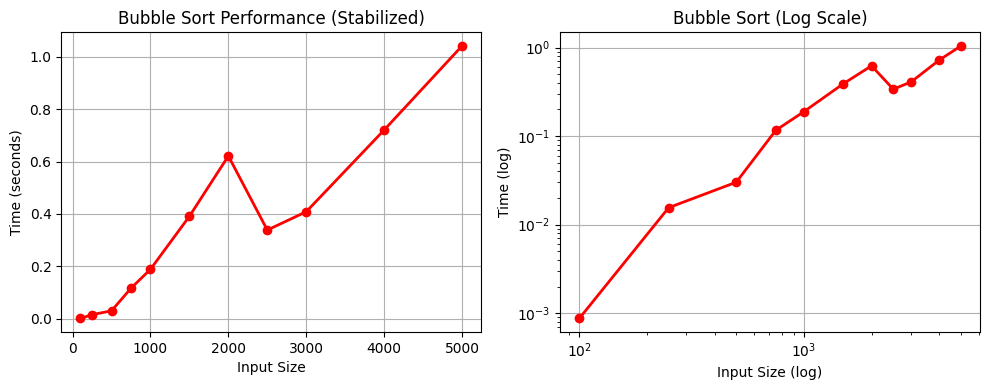

Size:  100 | Bubble Sort: 0.00087s
Size:  250 | Bubble Sort: 0.01554s
Size:  500 | Bubble Sort: 0.03017s
Size:  750 | Bubble Sort: 0.11633s
Size: 1000 | Bubble Sort: 0.18868s
Size: 1500 | Bubble Sort: 0.39089s
Size: 2000 | Bubble Sort: 0.62116s
Size: 2500 | Bubble Sort: 0.33844s
Size: 3000 | Bubble Sort: 0.40841s
Size: 4000 | Bubble Sort: 0.72030s
Size: 5000 | Bubble Sort: 1.04104s


In [3]:
sizes = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 4000, 5000]
bubble_times = []

def run_until_stable(sort_func, arr, tolerance=2.0, min_runs=3, max_runs=10):
    times = []
    for run in range(max_runs):
        test_arr = arr[:]
        start = time()
        sort_func(test_arr)
        end = time()
        times.append(end - start)
        
        if len(times) >= min_runs:
            recent_avg = sum(times[-min_runs:]) / min_runs
            if len(times) >= min_runs + 1:
                prev_avg = sum(times[-min_runs-1:-1]) / min_runs
                if abs(recent_avg - prev_avg) <= tolerance:
                    break
    
    return sum(times) / len(times), len(times)

print("Testing Bubble Sort with stabilization...")
for size in sizes:
    print(f"Testing size {size}...", end=" ")
    arr = [randint(0, 10000) for _ in range(size)]
    avg_time, runs = run_until_stable(bubble_sort, arr)
    bubble_times.append(avg_time)
    print(f"Avg: {avg_time:.5f}s ({runs} runs)")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(sizes, bubble_times, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Bubble Sort Performance (Stabilized)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.loglog(sizes, bubble_times, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Input Size (log)')
plt.ylabel('Time (log)')
plt.title('Bubble Sort (Log Scale)')
plt.grid(True)

plt.tight_layout()
plt.show()

for size, time_taken in zip(sizes, bubble_times):
    print(f"Size: {size:4} | Bubble Sort: {time_taken:.5f}s")

## Insertion Sort
Time Complexity: O(n²) average and worst case, O(n) best case

In [4]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key

Testing Insertion Sort with stabilization...
Testing size 100... Avg: 0.00017s (4 runs)
Testing size 250... Avg: 0.00099s (4 runs)
Testing size 500... Avg: 0.00468s (4 runs)
Testing size 750... Avg: 0.00936s (4 runs)
Testing size 1000... Avg: 0.01783s (4 runs)
Testing size 1500... 

Avg: 0.06028s (4 runs)
Testing size 2000... Avg: 0.07630s (4 runs)
Testing size 2500... Avg: 0.07630s (4 runs)
Testing size 2500... Avg: 0.11019s (4 runs)
Testing size 3000... Avg: 0.11019s (4 runs)
Testing size 3000... Avg: 0.16784s (4 runs)
Testing size 4000... Avg: 0.16784s (4 runs)
Testing size 4000... Avg: 0.30212s (4 runs)
Testing size 5000... Avg: 0.30212s (4 runs)
Testing size 5000... Avg: 0.52866s (4 runs)
Avg: 0.52866s (4 runs)


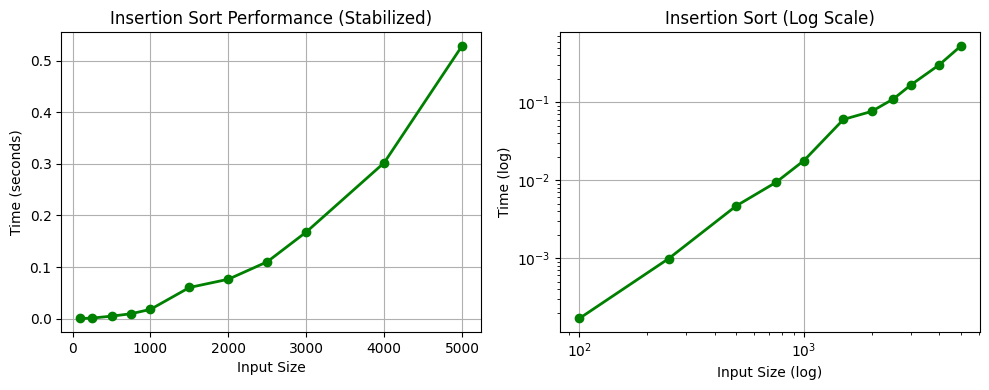

Size:  100 | Insertion Sort: 0.00017s
Size:  250 | Insertion Sort: 0.00099s
Size:  500 | Insertion Sort: 0.00468s
Size:  750 | Insertion Sort: 0.00936s
Size: 1000 | Insertion Sort: 0.01783s
Size: 1500 | Insertion Sort: 0.06028s
Size: 2000 | Insertion Sort: 0.07630s
Size: 2500 | Insertion Sort: 0.11019s
Size: 3000 | Insertion Sort: 0.16784s
Size: 4000 | Insertion Sort: 0.30212s
Size: 5000 | Insertion Sort: 0.52866s


In [5]:
insertion_times = []

print("Testing Insertion Sort with stabilization...")
for size in sizes:
    print(f"Testing size {size}...", end=" ")
    arr = [randint(0, 10000) for _ in range(size)]
    avg_time, runs = run_until_stable(insertion_sort, arr)
    insertion_times.append(avg_time)
    print(f"Avg: {avg_time:.5f}s ({runs} runs)")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(sizes, insertion_times, 'go-', linewidth=2, markersize=6)
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Insertion Sort Performance (Stabilized)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.loglog(sizes, insertion_times, 'go-', linewidth=2, markersize=6)
plt.xlabel('Input Size (log)')
plt.ylabel('Time (log)')
plt.title('Insertion Sort (Log Scale)')
plt.grid(True)

plt.tight_layout()
plt.show()

for size, time_taken in zip(sizes, insertion_times):
    print(f"Size: {size:4} | Insertion Sort: {time_taken:.5f}s")

## Quick Sort
Time Complexity: O(n log n) average case, O(n²) worst case

In [6]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        left = [x for x in arr[1:] if x < pivot]
        right = [x for x in arr[1:] if x >= pivot]
        return quick_sort(left) + [pivot] + quick_sort(right)

Testing Quick Sort with stabilization...
Testing size 100... Avg: 0.00009s (4 runs)
Testing size 250... Avg: 0.00021s (4 runs)
Testing size 500... Avg: 0.00062s (4 runs)
Testing size 750... Avg: 0.00071s (4 runs)
Testing size 1000... Avg: 0.00101s (4 runs)
Testing size 1500... Avg: 0.00182s (4 runs)
Testing size 2000... Avg: 0.00217s (4 runs)
Testing size 2500... Avg: 0.00464s (4 runs)
Testing size 3000... Avg: 0.00568s (4 runs)
Testing size 4000... Avg: 0.00446s (4 runs)
Testing size 5000... Avg: 0.00531s (4 runs)


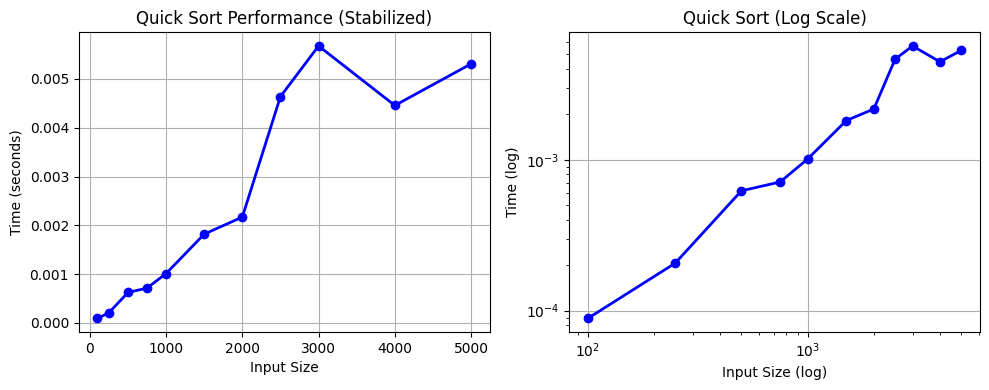

Size:  100 | Quick Sort: 0.00009s
Size:  250 | Quick Sort: 0.00021s
Size:  500 | Quick Sort: 0.00062s
Size:  750 | Quick Sort: 0.00071s
Size: 1000 | Quick Sort: 0.00101s
Size: 1500 | Quick Sort: 0.00182s
Size: 2000 | Quick Sort: 0.00217s
Size: 2500 | Quick Sort: 0.00464s
Size: 3000 | Quick Sort: 0.00568s
Size: 4000 | Quick Sort: 0.00446s
Size: 5000 | Quick Sort: 0.00531s


In [7]:
quick_times = []

print("Testing Quick Sort with stabilization...")
for size in sizes:
    print(f"Testing size {size}...", end=" ")
    arr = [randint(0, 10000) for _ in range(size)]
    avg_time, runs = run_until_stable(quick_sort, arr)
    quick_times.append(avg_time)
    print(f"Avg: {avg_time:.5f}s ({runs} runs)")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(sizes, quick_times, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Quick Sort Performance (Stabilized)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.loglog(sizes, quick_times, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Input Size (log)')
plt.ylabel('Time (log)')
plt.title('Quick Sort (Log Scale)')
plt.grid(True)

plt.tight_layout()
plt.show()

for size, time_taken in zip(sizes, quick_times):
    print(f"Size: {size:4} | Quick Sort: {time_taken:.5f}s")

## Final Comparison
Comparing all three algorithms side by side using the same test data.

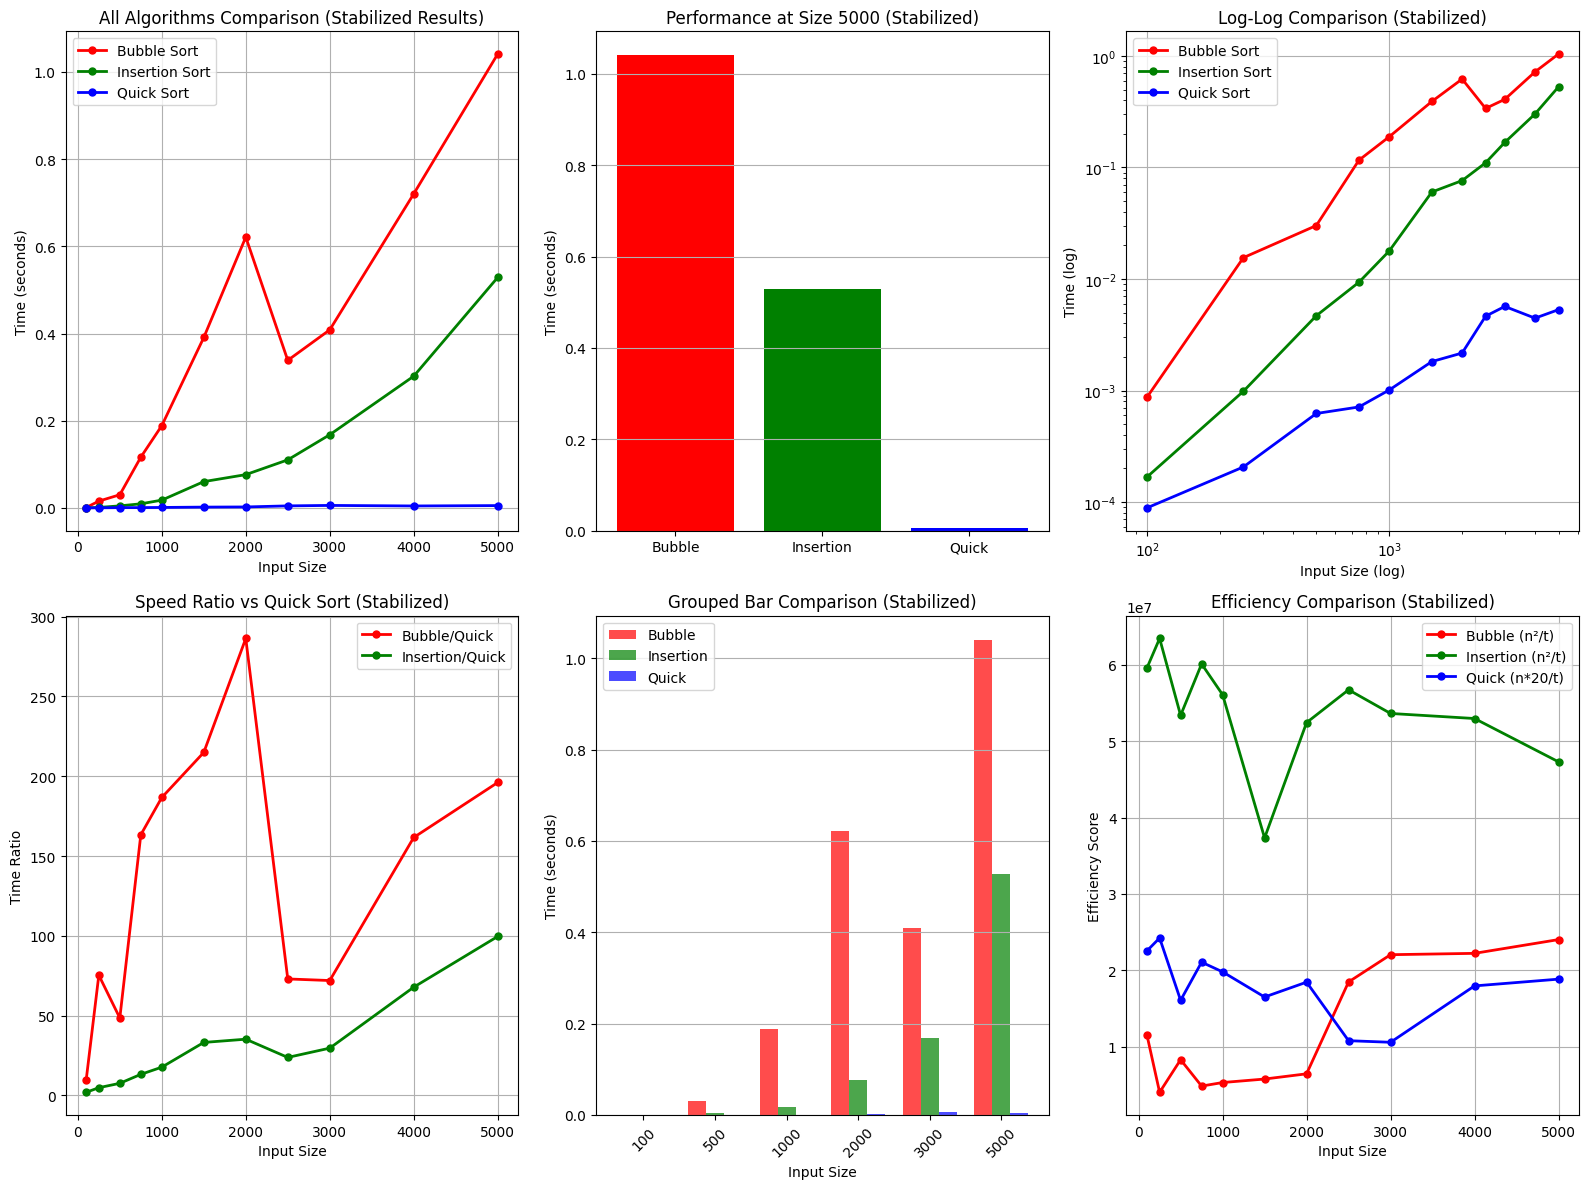


Stabilized Results Summary:
Size  100: Bubble=0.00087s | Insertion=0.00017s | Quick=0.00009s
Size  250: Bubble=0.01554s | Insertion=0.00099s | Quick=0.00021s
Size  500: Bubble=0.03017s | Insertion=0.00468s | Quick=0.00062s
Size  750: Bubble=0.11633s | Insertion=0.00936s | Quick=0.00071s
Size 1000: Bubble=0.18868s | Insertion=0.01783s | Quick=0.00101s
Size 1500: Bubble=0.39089s | Insertion=0.06028s | Quick=0.00182s
Size 2000: Bubble=0.62116s | Insertion=0.07630s | Quick=0.00217s
Size 2500: Bubble=0.33844s | Insertion=0.11019s | Quick=0.00464s
Size 3000: Bubble=0.40841s | Insertion=0.16784s | Quick=0.00568s
Size 4000: Bubble=0.72030s | Insertion=0.30212s | Quick=0.00446s
Size 5000: Bubble=1.04104s | Insertion=0.52866s | Quick=0.00531s

Growth Rate Analysis (Stabilized Data):
Size 100 -> 250 (x2.50): Bubble x17.83 | Insertion x5.87 | Quick x2.33
Size 250 -> 500 (x2.00): Bubble x1.94 | Insertion x4.75 | Quick x3.02
Size 500 -> 750 (x1.50): Bubble x3.86 | Insertion x2.00 | Quick x1.14
Size

In [8]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.plot(sizes, bubble_times, 'ro-', linewidth=2, markersize=5, label='Bubble Sort')
plt.plot(sizes, insertion_times, 'go-', linewidth=2, markersize=5, label='Insertion Sort')
plt.plot(sizes, quick_times, 'bo-', linewidth=2, markersize=5, label='Quick Sort')
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('All Algorithms Comparison (Stabilized Results)')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.bar(['Bubble', 'Insertion', 'Quick'], 
        [bubble_times[-1], insertion_times[-1], quick_times[-1]], 
        color=['red', 'green', 'blue'])
plt.ylabel('Time (seconds)')
plt.title(f'Performance at Size {sizes[-1]} (Stabilized)')
plt.grid(True, axis='y')

plt.subplot(2, 3, 3)
plt.loglog(sizes, bubble_times, 'ro-', linewidth=2, markersize=5, label='Bubble Sort')
plt.loglog(sizes, insertion_times, 'go-', linewidth=2, markersize=5, label='Insertion Sort')
plt.loglog(sizes, quick_times, 'bo-', linewidth=2, markersize=5, label='Quick Sort')
plt.xlabel('Input Size (log)')
plt.ylabel('Time (log)')
plt.title('Log-Log Comparison (Stabilized)')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 4)
ratios_bubble = [b/q for b, q in zip(bubble_times, quick_times)]
ratios_insertion = [i/q for i, q in zip(insertion_times, quick_times)]
plt.plot(sizes, ratios_bubble, 'ro-', linewidth=2, markersize=5, label='Bubble/Quick')
plt.plot(sizes, ratios_insertion, 'go-', linewidth=2, markersize=5, label='Insertion/Quick')
plt.xlabel('Input Size')
plt.ylabel('Time Ratio')
plt.title('Speed Ratio vs Quick Sort (Stabilized)')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 5)
every_other = range(0, len(sizes), 2)
x_pos = range(len(every_other))
width = 0.25
plt.bar([x - width for x in x_pos], [bubble_times[i] for i in every_other], width, label='Bubble', color='red', alpha=0.7)
plt.bar(x_pos, [insertion_times[i] for i in every_other], width, label='Insertion', color='green', alpha=0.7)
plt.bar([x + width for x in x_pos], [quick_times[i] for i in every_other], width, label='Quick', color='blue', alpha=0.7)
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Grouped Bar Comparison (Stabilized)')
plt.xticks(x_pos, [sizes[i] for i in every_other], rotation=45)
plt.legend()
plt.grid(True, axis='y')

plt.subplot(2, 3, 6)
efficiency_bubble = [sizes[i]**2 / bubble_times[i] for i in range(len(sizes))]
efficiency_insertion = [sizes[i]**2 / insertion_times[i] for i in range(len(sizes))]
efficiency_quick = [sizes[i] * 20 / quick_times[i] for i in range(len(sizes))]
plt.plot(sizes, efficiency_bubble, 'ro-', linewidth=2, markersize=5, label='Bubble (n²/t)')
plt.plot(sizes, efficiency_insertion, 'go-', linewidth=2, markersize=5, label='Insertion (n²/t)')
plt.plot(sizes, efficiency_quick, 'bo-', linewidth=2, markersize=5, label='Quick (n*20/t)')
plt.xlabel('Input Size')
plt.ylabel('Efficiency Score')
plt.title('Efficiency Comparison (Stabilized)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nStabilized Results Summary:")
print("=" * 80)
for i, size in enumerate(sizes):
    print(f"Size {size:4}: Bubble={bubble_times[i]:.5f}s | Insertion={insertion_times[i]:.5f}s | Quick={quick_times[i]:.5f}s")

print("\nGrowth Rate Analysis (Stabilized Data):")
print("=" * 60)
for i in range(1, len(sizes)):
    size_ratio = sizes[i] / sizes[i-1]
    bubble_ratio = bubble_times[i] / bubble_times[i-1]
    insertion_ratio = insertion_times[i] / insertion_times[i-1]
    quick_ratio = quick_times[i] / quick_times[i-1]
    print(f"Size {sizes[i-1]} -> {sizes[i]} (x{size_ratio:.2f}): Bubble x{bubble_ratio:.2f} | Insertion x{insertion_ratio:.2f} | Quick x{quick_ratio:.2f}")

print(f"\nNote: All results are averaged from multiple runs until stabilized within ±2 seconds.")